In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('data.csv')

In [11]:
df.drop(['Unnamed: 0', 'ID'], axis='columns', inplace=True)

In [38]:
class clustering:
    def __init__(self, df):
        self.df = df
        
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df)
        
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        pca.fit(scaled_data)
        pca_features = pca.transform(scaled_data)
        self.pca_features = pca_features
        
  
    def elbow_plot(self):
        from sklearn.cluster import KMeans
        import matplotlib.pyplot as plt
        %matplotlib inline
        
        k_range = range(1, 11)
        sse = []
        
        for k in k_range:
            km = KMeans(n_clusters=k)
            km.fit(self.pca_features)
            sse.append(km.inertia_)
        plt.title("K vs SSE(choose k value)")
        plt.xlabel('K')
        plt.ylabel('SSE')
        plt.plot(k_range, sse)
        
    
    def plot_clusters(self, k):
        import matplotlib.pyplot as plt
        %matplotlib inline
        
        try:
            from sklearn.cluster import KMeans
            km = KMeans(n_clusters=k)
            predicted = km.fit_predict(self.pca_features)
            plt.scatter(self.pca_features[:, 0], self.pca_features[:, 1], c=predicted, cmap='plasma')
            plt.xlabel('pca1')
            plt.ylabel('pca2')
        except:
            print("supply the predicted parameters of clusters which is one dimensional array") 

In [39]:
d = clustering(df)

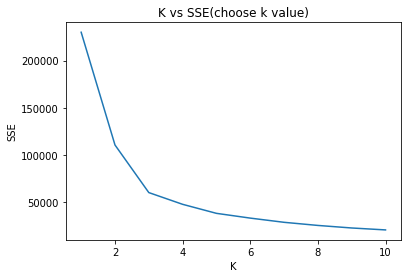

In [40]:
d.elbow_plot()

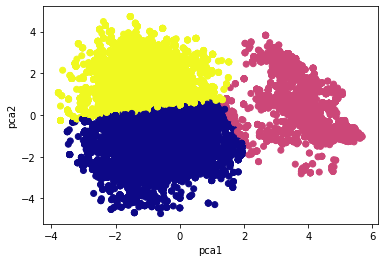

In [41]:
d.plot_clusters(3)